## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

## **Read CSV file**

In [2]:
df=pd.read_csv("heart.csv");

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [5]:
df.shape

(918, 12)

In [6]:
print('Sex', df['Sex'].unique())
print('ChestPainType', df['ChestPainType'].unique())
print('RestingECG', df['RestingECG'].unique())
print('ExerciseAngina', df['ExerciseAngina'].unique())
print('ST_Slope', df['ST_Slope'].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


In [7]:
sex_map = {'M':1, 'F':2}
chest_pain_type_map = {'ATA':1, 'NAP':2, 'ASY':3, 'TA':4 }
resting_ecg_map = {'Normal':1, 'ST':2, 'LVH':3}
excercise_angina_map = {'N':1, 'Y':2}
st_slop_map = {'Up':1, 'Flat':2, 'Down':3 }

In [8]:
df['Sex']=df['Sex'].map(sex_map)
df['ChestPainType']=df['ChestPainType'].map(chest_pain_type_map)
df['RestingECG']=df['RestingECG'].map(resting_ecg_map)
df['ExerciseAngina']=df['ExerciseAngina'].map(excercise_angina_map)
df['ST_Slope']=df['ST_Slope'].map(st_slop_map)

In [9]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,1,0.0,1,0
1,49,2,2,160,180,0,1,156,1,1.0,2,1
2,37,1,1,130,283,0,2,98,1,0.0,1,0
3,48,2,3,138,214,0,1,108,2,1.5,2,1
4,54,1,2,150,195,0,1,122,1,0.0,1,0


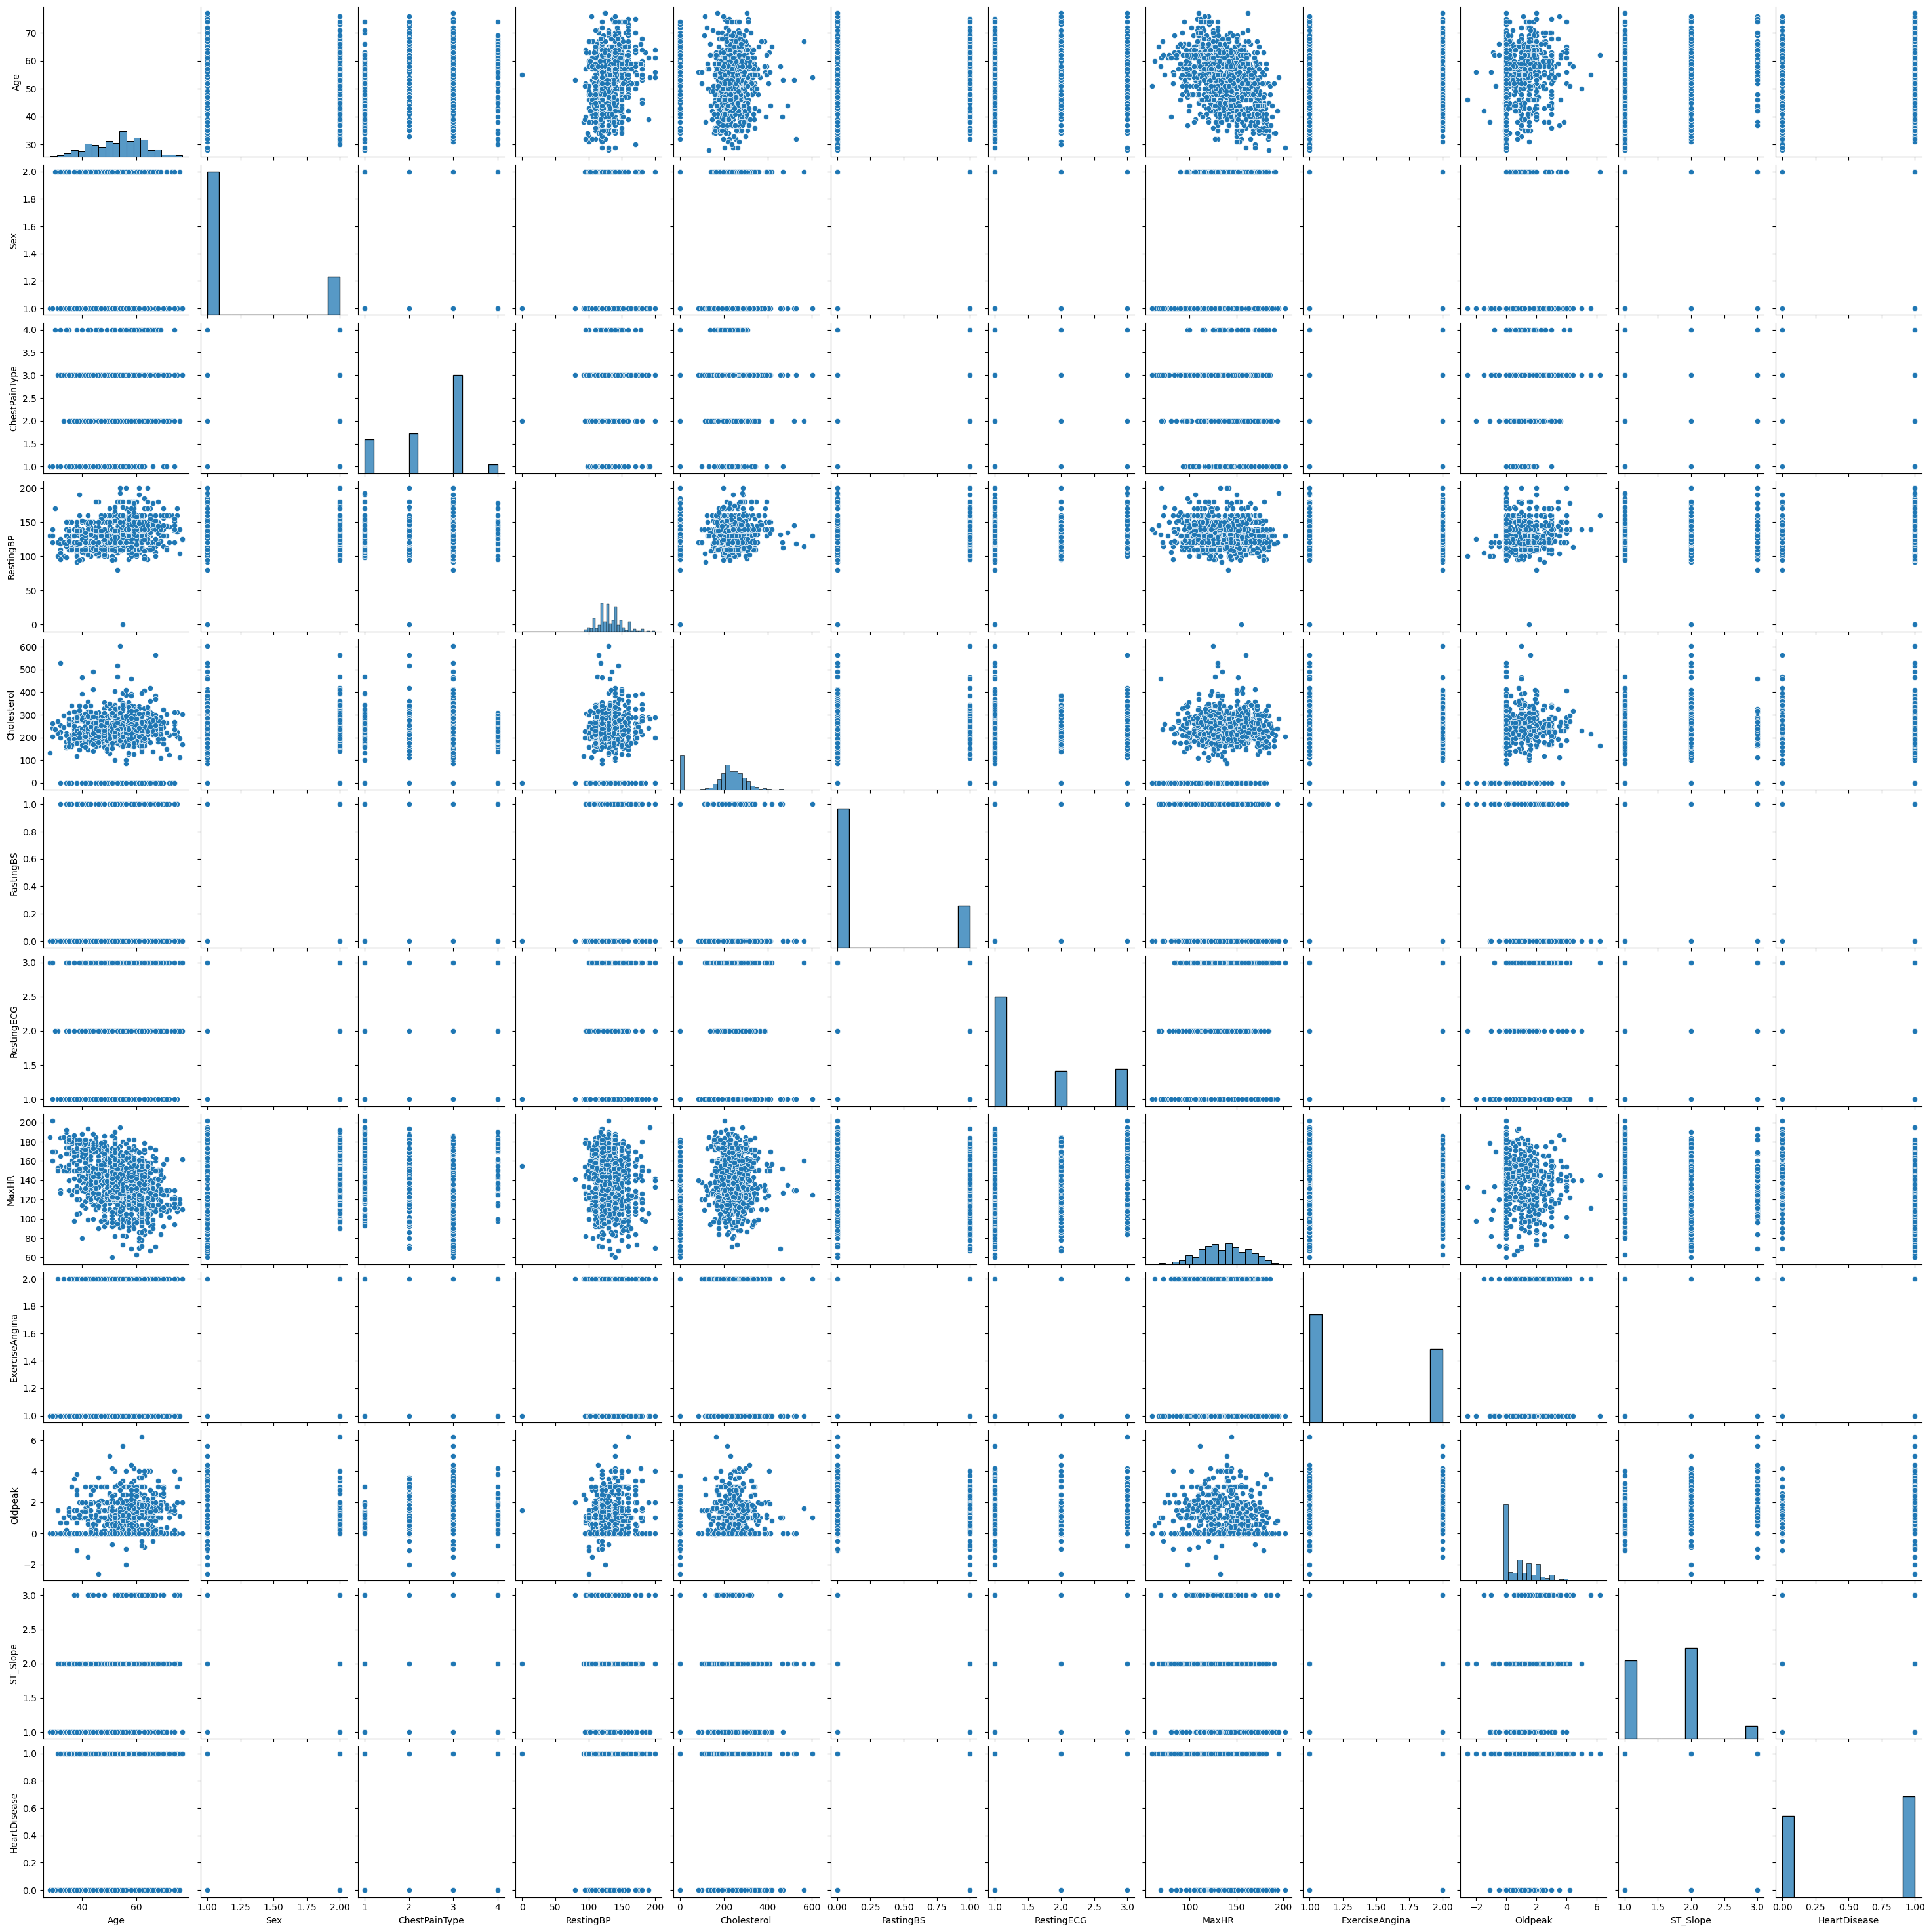

In [10]:
sns.pairplot(df);

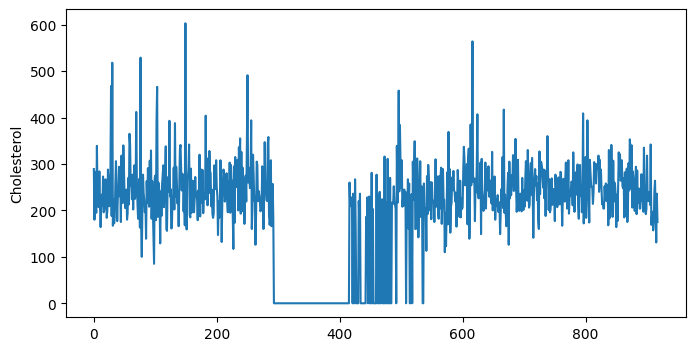

In [11]:
fig,ax=plt.subplots(figsize=(8,4));
sns.lineplot(data=df['Cholesterol']);

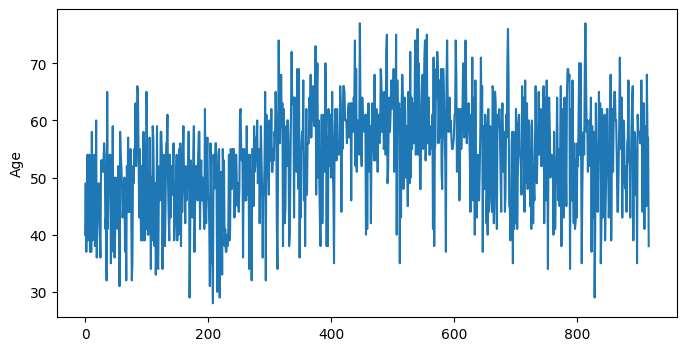

In [12]:
fig,ax=plt.subplots(figsize=(8,4));
sns.lineplot(data=df['Age']);

In [13]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [14]:
X=df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
          'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]

In [15]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,1,0.0,1
1,49,2,2,160,180,0,1,156,1,1.0,2
2,37,1,1,130,283,0,2,98,1,0.0,1
3,48,2,3,138,214,0,1,108,2,1.5,2
4,54,1,2,150,195,0,1,122,1,0.0,1


In [16]:
X = X.values

In [17]:
y=df['HeartDisease']

In [18]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [19]:
y = y.values

## **Splitting Dataset into training and testing by train_test_split**

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=22)

## ***1.Logistic Regression Model***

In [21]:
from sklearn.linear_model import LogisticRegression
model_lgr=LogisticRegression()
model_lgr.fit(X_train,y_train)

C:\Users\HP\.conda\envs\heart\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_predict_lgr=model_lgr.predict(X_test)

### **Model Evaluation**

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy of the model by Logistic Regression is :",accuracy_score(y_test,y_predict_lgr)*100)
print(confusion_matrix(y_test,y_predict_lgr))

Accuracy of the model by Logistic Regression is : 83.69565217391305
[[102  20]
 [ 25 129]]


In [24]:
print(classification_report(y_test,y_predict_lgr))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       122
           1       0.87      0.84      0.85       154

    accuracy                           0.84       276
   macro avg       0.83      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



## ***2.KNN***

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier()

In [26]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [27]:
y_predict_knn=model_knn.predict(X_test)

### **Model Evaluation**

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy of the model by KNN is :",accuracy_score(y_test,y_predict_knn)*100)

Accuracy of the model by KNN is : 67.7536231884058


In [29]:
print(confusion_matrix(y_test,y_predict_knn))

[[ 70  52]
 [ 37 117]]


In [30]:
print(classification_report(y_test,y_predict_knn))

              precision    recall  f1-score   support

           0       0.65      0.57      0.61       122
           1       0.69      0.76      0.72       154

    accuracy                           0.68       276
   macro avg       0.67      0.67      0.67       276
weighted avg       0.68      0.68      0.67       276



## ***3.Decision Tree*** ##

In [1]:
from sklearn import tree

model_tree = tree.DecisionTreeClassifier()   # empty model of the decision tree
model_tree.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [ ]:
y_predict_tree=model_tree.predict(X_test)

### **Model Evaluation**

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy of the model by Decision Tree is : ",accuracy_score(y_test,y_predict_tree)*100)

Accuracy of the model by Decision Tree is :  79.71014492753623


In [34]:
print(confusion_matrix(y_test,y_predict_tree))

[[ 97  25]
 [ 31 123]]


In [35]:
print(classification_report(y_test,y_predict_tree))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       122
           1       0.83      0.80      0.81       154

    accuracy                           0.80       276
   macro avg       0.79      0.80      0.80       276
weighted avg       0.80      0.80      0.80       276



In [36]:
import ipywidgets as widgets
import ipywidgets
from ipywidgets import interact

In [37]:
selected_algo = None
def onSelectAlgoritham(x):
    global selected_algo
    selected_algo = x
    
selected_sex = None
def onSelectSex(x):
    global selected_sex
    selected_sex = x
    
selected_chest_pain_type = None
def onSelectChestPainType(x):
    global selected_chest_pain_type
    selected_chest_pain_type = x
        
selected_resting_ecg = None
def onSelectRestingECG(x):
    global selected_resting_ecg
    selected_resting_ecg = x

selected_exercise_angina = None
def onSelectExerciseAngina(x):
    global selected_exercise_angina
    selected_exercise_angina = x
    

selected_st_slope = None
def onSelectST_Slope(x):
    global selected_st_slope
    selected_st_slope = x
    


In [38]:
interact(onSelectAlgoritham, x=ipywidgets.Combobox(options=["LogisticRegression", "KNeighborsClassifier", "DecisionTreeClassifier"]))
#onSelectAlgoritham("LogisticRegression")

interactive(children=(Combobox(value='', description='x', options=('LogisticRegression', 'KNeighborsClassifier…

<function __main__.onSelectAlgoritham(x)>

In [39]:
input_age=float(input("Enter age :-"))

Enter age :-45


In [40]:
interact(onSelectSex, x=ipywidgets.Combobox(options=['Male', 'Female']));

#onSelectSex("Male")

interactive(children=(Combobox(value='', description='x', options=('Male', 'Female')), Output()), _dom_classes…

In [41]:
interact(onSelectChestPainType, x=ipywidgets.Combobox(options=['ATA', 'NAP', 'ASY', 'TA']))

#onSelectChestPainType('ATA')

interactive(children=(Combobox(value='', description='x', options=('ATA', 'NAP', 'ASY', 'TA')), Output()), _do…

<function __main__.onSelectChestPainType(x)>

In [42]:
input_resting_bp=float(input("Enter RestingBP : "))

Enter RestingBP : 89


In [43]:
input_cholesterol=float(input("Enter Cholesterol : "))

Enter Cholesterol : 45


In [44]:
input_fasting_bs=float(input("Enter FastingBS : "))

Enter FastingBS : 0


In [45]:
interact(onSelectRestingECG, x=ipywidgets.Combobox(options=['Normal', 'ST', 'LVH']));

#onSelectRestingECG("Normal")

interactive(children=(Combobox(value='', description='x', options=('Normal', 'ST', 'LVH')), Output()), _dom_cl…

In [46]:
input_max_hr=float(input("Enter Max HR : "))

Enter Max HR : 0.0


In [47]:
interact(onSelectExerciseAngina, x=ipywidgets.Combobox(options=['Yes', 'No']));

#onSelectExerciseAngina("Yes")

interactive(children=(Combobox(value='', description='x', options=('Yes', 'No')), Output()), _dom_classes=('wi…

In [48]:
input_oldpeak = float(input("Enter Oldpeak : ")) 


Enter Oldpeak : 45


In [49]:
interact(onSelectST_Slope, x=ipywidgets.Combobox(options=['Up', 'Flat', 'Down']));
#onSelectST_Slope("Flat")

interactive(children=(Combobox(value='', description='x', options=('Up', 'Flat', 'Down')), Output()), _dom_cla…

In [52]:
print(selected_algo)
print(input_age)
print(selected_sex)
print(selected_chest_pain_type)
print(input_resting_bp)
print(input_cholesterol)
print(input_fasting_bs)
print(selected_resting_ecg)
print(input_max_hr)
print(selected_exercise_angina)
print(input_oldpeak)
print(selected_st_slope)

LogisticRegression
45.0
Male
ATA
89.0
45.0
0.0
Normal
0.0
Yes
45.0
Up


In [53]:
sex_int = sex_map[selected_sex[0]]
sex_int = float(sex_int)

chest_pain_type_int = chest_pain_type_map[selected_chest_pain_type]
chest_pain_type_int = float(chest_pain_type_int)

resting_ecg_int = resting_ecg_map[selected_resting_ecg]
resting_ecg_int = float(resting_ecg_int)

selected_exercise_int = excercise_angina_map[selected_exercise_angina[0]]
selected_exercise_int = float(selected_exercise_int)

selected_st_slope_int = st_slop_map[selected_st_slope]
selected_st_slope_int = float(selected_st_slope_int)

In [ ]:
#buy pass algo for selection and all input entries
#selected_algo = "DecisionTreeClassifier"

In [54]:
if selected_algo == "LogisticRegression":
    result = model_lgr.predict([[input_age, sex_int, chest_pain_type_int, input_resting_bp
                                    , input_cholesterol, input_fasting_bs, resting_ecg_int, input_max_hr,
                                         selected_exercise_int, input_oldpeak, selected_st_slope_int]])

    print("LogisticRegression:")
    print(result)
    if result[0]==0:
        print("Heart disease not detected!")
    elif result[0]==1:
        print("Heart disease detected!")

elif selected_algo == "KNeighborsClassifier":
    result = model_knn.predict([[input_age, sex_int, chest_pain_type_int, input_resting_bp
                                    , input_cholesterol, input_fasting_bs, resting_ecg_int, input_max_hr,
                                         selected_exercise_int, input_oldpeak, selected_st_slope_int]])
    print("KNeighborsClassifier:")
    print(result)
    if result[0]==0:
        print("Heart disease not detected!")
    elif result[0]==1:
        print("Heart disease detected!")

elif selected_algo == "DecisionTreeClassifier":
    result = model_tree.predict([[input_age, sex_int, chest_pain_type_int, input_resting_bp
                                    , input_cholesterol, input_fasting_bs, resting_ecg_int, input_max_hr,
                                         selected_exercise_int, input_oldpeak, selected_st_slope_int]])
    print("DecisionTreeClassifier:")
    print(result)
    if result[0]==0:
        print("Heart disease not detected!")
    elif result[0]==1:
        print("Heart disease detected!")
    
    


LogisticRegression:
[1]
Heart disease deteacted!
